<a href="https://colab.research.google.com/github/sathishram12/scalerdsmlAssignments/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AeroFit
Evalution Criteria: 
1. Defining Problem Statement and Analysing basic metrics (10 Points)
2. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)
3. Visual Analysis - Univariate & Bivariate (30 Points)
4. Missing Value & Outlier Detection (10 Points)
5. Business Insights based on Non-Graphical and Visual Analysis (10 Points)
6. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand


# Problem Statement

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


In [ ]:
# !pip install pandas-profiling==3.1.0

In [ ]:
import pandas as pd 
pd.options.plotting.backend = "plotly"

import numpy as np
import missingno as msno
import pandas_profiling as pf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

# Basic Metrics

## Size, shape and data types

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")
display(df.head())
print()
print(f"Rows/columns dimension - {df.shape}")
print()
print("Data types and basic Information - ")
print(df.info())

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47



Rows/columns dimension - (180, 9)

Data types and basic Information - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


We do not have any null values in our data set which makes it easier for us to conduct our data analysis.

## convert object data types to Categorical 

In [ ]:
df["Product"]=df["Product"].astype("category")
df["Gender"]=df["Gender"].astype("category")
df["MaritalStatus"]=df["MaritalStatus"].astype("category")

## Summary

In [ ]:
display(df.describe(include="category").T)

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Outlier Detection

## Income Vs product 

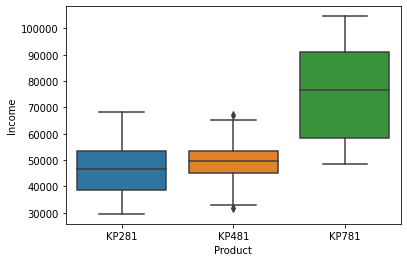

In [ ]:
sns.boxplot(x='Product',y ='Income',data=df)

Observations:
- Persons who have more income are purchasing KP781
- In KP481, we have one outlier point

## Gender vs Income

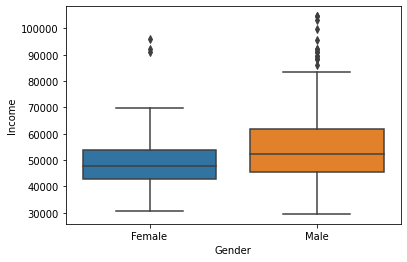

In [ ]:
sns.boxplot(x='Gender',y ='Income',data=df)

Observations:
- Male population has more Income and more outlier points

In [ ]:
df.groupby('Gender')['Income'].mean()

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

Lets check mean after removing outlier points

In [ ]:
# Removing outliers
q1=df['Income'].quantile(.25)
q3=df['Income'].quantile(.75)
iqr=q3-q1
df=df[(df['Income']>q1-1.5*iqr)&(df['Income']<q3+1.5*iqr)]
df.groupby('Gender')['Income'].mean()

Gender
Female    48056.356164
Male      50000.840909
Name: Income, dtype: float64

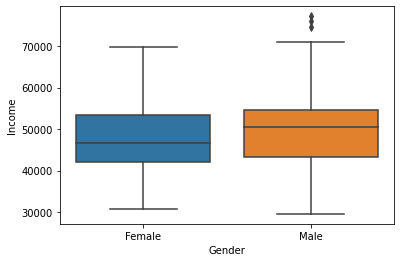

In [ ]:
sns.boxplot(x='Gender', y='Income', data=df
            )

In [ ]:
df[df['Product']=='KP481'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


In [ ]:
df[df['Product']=='KP481'].describe(include="category").T

,count,unique,top,freq
Product,60,1,KP481,60
Gender,60,2,Male,31
MaritalStatus,60,2,Partnered,36


In [ ]:
df[df['Product']=='KP481']['Age'].median()

26.0

In [ ]:
3 * (df[df['Product']=='KP481']['Age'].median() - df[df['Product']=='KP481']['Age'].mean()) / df[df['Product']=='KP481']['Age'].std()

-1.3092062021359994

Observations
- Average age of customer who purchases KP481 is 28.9 , Median is 26 . Age is left skewed. Customer range is between 24-33
- There are 60 customers who purchased KP481 Model

# Correlation Matrix

In [ ]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.208992,-0.125330,-0.118570,0.551113,-0.165710
Education,0.208992,1.000000,0.315696,0.313260,0.600964,0.260524
Usage,-0.125330,0.315696,1.000000,0.578850,0.279502,0.744355
Fitness,-0.118570,0.313260,0.578850,1.000000,0.246177,0.780566
Income,0.551113,0.600964,0.279502,0.246177,1.000000,0.252686
Miles,-0.165710,0.260524,0.744355,0.780566,0.252686,1.000000


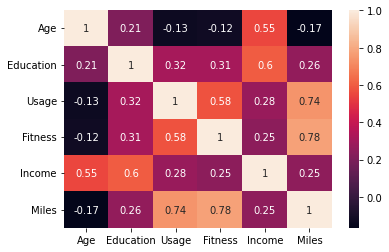

In [ ]:
sns.heatmap(df.corr(),annot=True)

Observations
- Age and Income, Income and Education, fitness and usage, Usage and Miles, Fitness and miles has high correlation
- None of the columns has negative correlation

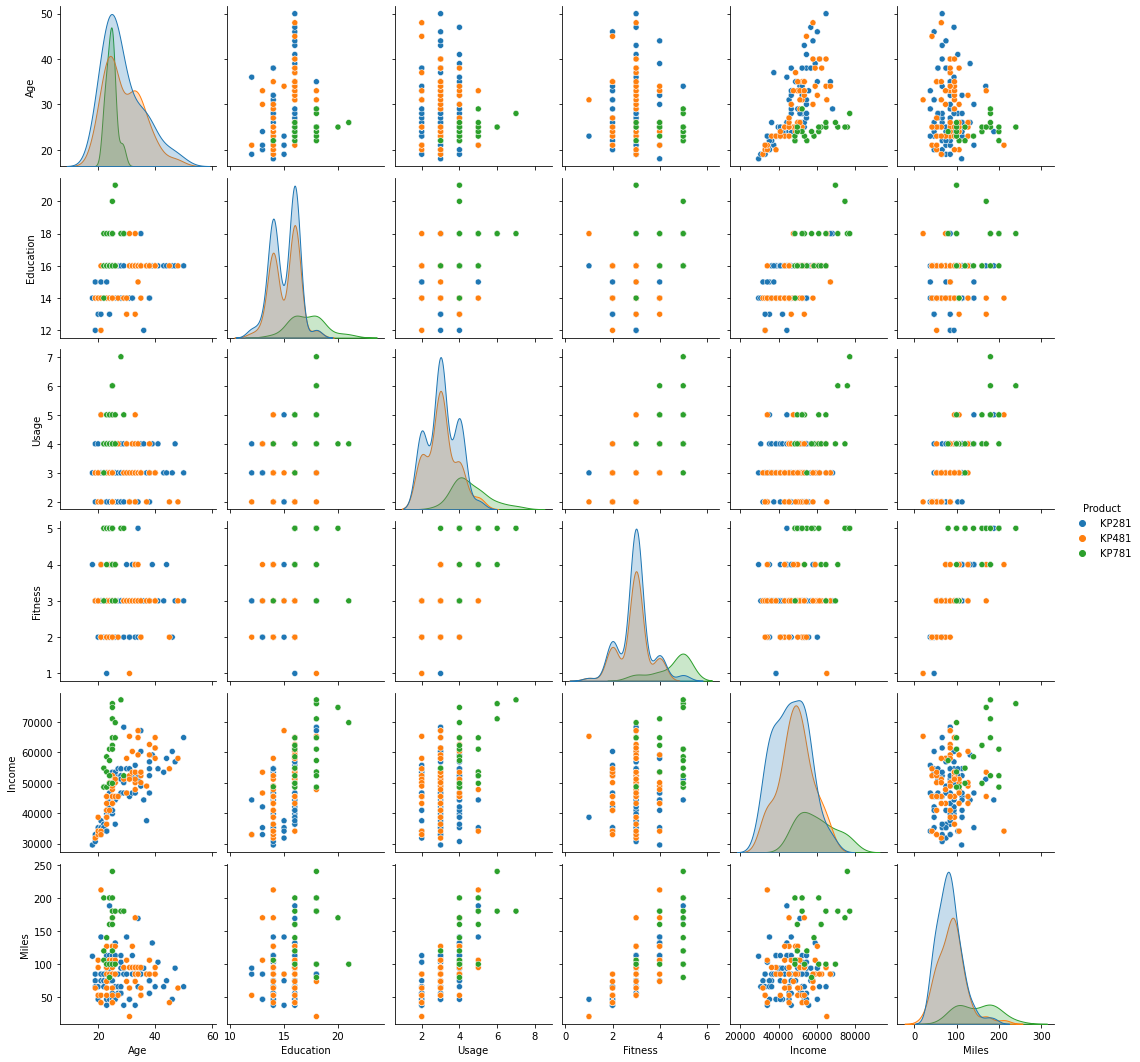

In [ ]:
sns.pairplot(df, hue='Product')

# Bivariate Analysis

## Age vs Income

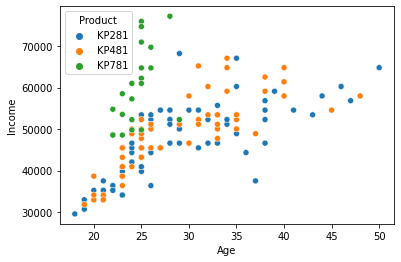

In [ ]:
sns.scatterplot(x='Age', y='Income', hue='Product', data=df)

Observations
- We can conclude that people with income groups equal to or higher that 50,000 tend to buy TM798

## Usage vs Income

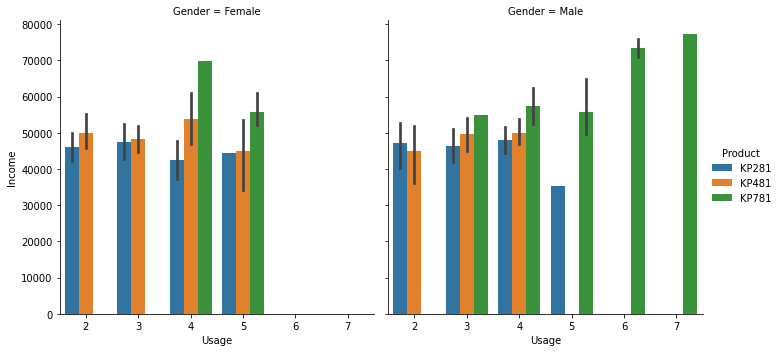

In [ ]:
sns.catplot(x='Usage', y='Income', col='Gender',hue='Product' ,kind="bar", data=df) 

Observations 
- Those who have KP781 used more than other products 

## Age vs Income with Usage and product

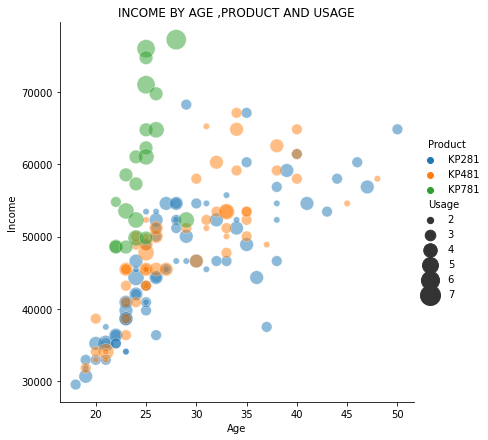

In [ ]:
sns.relplot(x="Age", y="Income", hue="Product", size="Usage",
            sizes=(40, 400), alpha=.5,
            height=6, data=df).set(title='INCOME BY AGE ,PRODUCT AND USAGE');



OBSERVATION
- Products KP481 and KP781 are bought by people with lower than 70K as income and age is concentrated more in range of 23-35
- Product KP781 is mainly bought by people with higher than 70K income and age falls in range of 23-30. 
- Majority of people who buys the KP781 expect that they will run more than consumers of the other two products, on average.



#  Customer Profiling


### Product Analysis

In [ ]:
px.pie(df, values=df['Product'].value_counts(), names=df['Product'].value_counts().index, title='Pie chart of Product Sales')

In [ ]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,24.844720,18.012422,2.484472,45.341615
Male,24.844720,19.254658,10.559006,54.658385
All,49.689441,37.267081,13.043478,100.000000


In [ ]:
df.groupby(['Gender','MaritalStatus','Product']).sum()['Miles'].unstack()

Product               KP281  KP481  KP781
Gender MaritalStatus                     
Female Partnered       2023   1410    200
       Single          1025   1123    400
Male   Partnered       1684   1832   1410
       Single          1891    911   1106

#### KP281

In [ ]:
df[df['Product']=='KP281'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


In [ ]:
df[df['Product']=='KP281'].describe(include="category").T

,count,unique,top,freq
Product,80,1,KP281,80
Gender,80,2,Female,40
MaritalStatus,80,2,Partnered,48


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'MARTIAL STATUS BY GENDER USING KP281')]

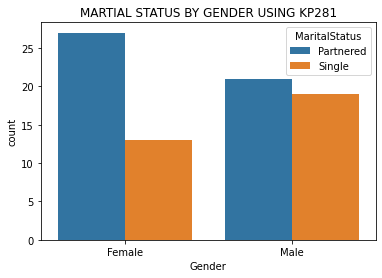

In [ ]:
df_KP28 = df[df['Product']=='KP281']
sns.countplot(df_KP28['Gender'],hue=df_KP28["MaritalStatus"]).set(title='MARTIAL STATUS BY GENDER USING KP281')

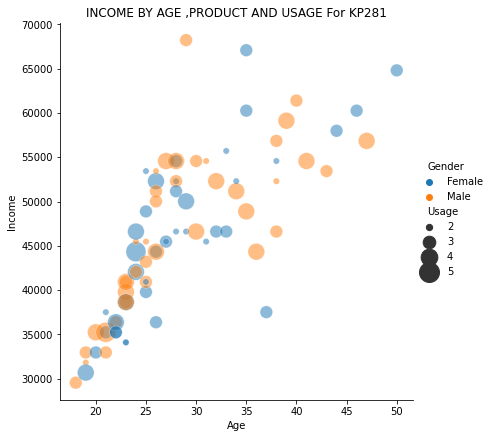

In [ ]:
sns.relplot(x="Age", y="Income", hue="Gender", size="Usage",
            sizes=(40, 400), alpha=.5,
            height=6, data=df_KP28).set(title='INCOME BY AGE ,PRODUCT AND USAGE For KP281');

In [ ]:
pd.crosstab(index=df_KP28['Gender'],columns=df['MaritalStatus'],margins=True, normalize=True)*100

MaritalStatus,Partnered,Single,All
Gender,,,
Female,33.75,16.25,50.0
Male,26.25,23.75,50.0
All,60.00,40.00,100.0


Observations
- The average age of customers who bought KP281 is 28.5, whereas the min and max age is 18 and 50 respectively.
- Average Income of customers who have KP281 has 46418.
- Partnered Female customers using KP281 about 33% however Partnered male has 26%
- Single Female using KP281 about 16% while Single male using about 23%

#### KP481 

In [ ]:
df[df['Product']=='KP481'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


In [ ]:
df[df['Product']=='KP481'].describe(include="category").T

,count,unique,top,freq
Product,60,1,KP481,60
Gender,60,2,Male,31
MaritalStatus,60,2,Partnered,36


In [ ]:
3 * (df[df['Product']=='KP481']['Age'].median() - df[df['Product']=='KP481']['Age'].mean()) / df[df['Product']=='KP481']['Age'].std()

-1.3092062021359994

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'MARTIAL STATUS BY GENDER USING KP481')]

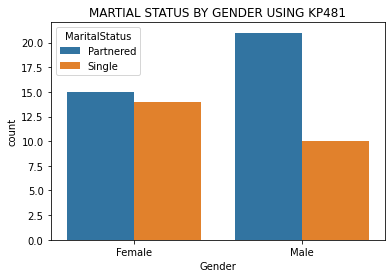

In [ ]:
df_KP48 = df[df['Product']=='KP481']
sns.countplot(df_KP48['Gender'],hue=df_KP48["MaritalStatus"]).set(title='MARTIAL STATUS BY GENDER USING KP481')

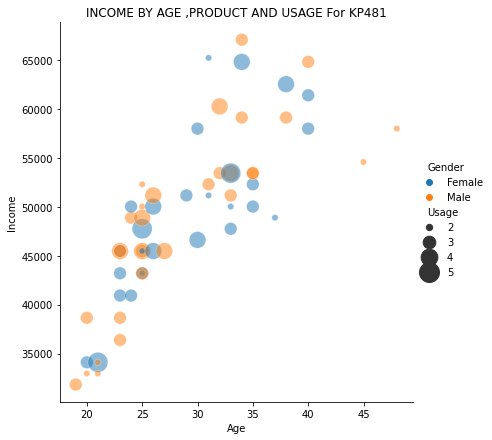

In [ ]:
sns.relplot(x="Age", y="Income", hue="Gender", size="Usage",
            sizes=(40, 400), alpha=.5,
            height=6, data=df_KP48).set(title='INCOME BY AGE ,PRODUCT AND USAGE For KP481');

In [ ]:
pd.crosstab(index=df_KP48['Gender'],columns=df['MaritalStatus'],margins=True, normalize=True)*100

MaritalStatus,Partnered,Single,All
Gender,,,
Female,25.0,23.333333,48.333333
Male,35.0,16.666667,51.666667
All,60.0,40.000000,100.000000


Observations
- The average age of customers who bought KP481 is 28.9, whereas the min and max age is 19 and 48 respectively.
- Average Income of customers who have KP481 has 48973.
- Partnered Female customers using KP481 about 23% however Partnered male has 16%
- Single Female using KP481 about 25% while Single male using about 33%

#### KP781 

In [ ]:
df[df['Product']=='KP781'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,21.0,24.523810,1.806074,22.0,23.0,25.0,25.0,29.0
Education,21.0,17.190476,1.600595,14.0,16.0,18.0,18.0,21.0
Usage,21.0,4.571429,0.925820,3.0,4.0,4.0,5.0,7.0
Fitness,21.0,4.523810,0.749603,3.0,4.0,5.0,5.0,5.0
Income,21.0,59825.095238,9560.943410,48556.0,52290.0,58516.0,64741.0,77191.0
Miles,21.0,148.380952,45.266407,80.0,100.0,160.0,180.0,240.0


In [ ]:
df[df['Product']=='KP781'].describe(include="category").T

,count,unique,top,freq
Product,21,1,KP781,21
Gender,21,2,Male,17
MaritalStatus,21,2,Single,11


In [ ]:
3 * (df[df['Product']=='KP781']['Income'].median() - df[df['Product']=='KP781']['Income'].mean()) / df[df['Product']=='KP781']['Income'].std()

-0.41076340961825414

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'MARTIAL STATUS BY GENDER USING KP781')]

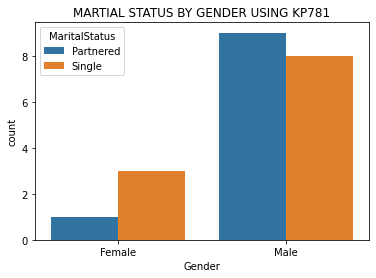

In [ ]:
df_KP78 = df[df['Product']=='KP781']
sns.countplot(df_KP78['Gender'],hue=df_KP78["MaritalStatus"]).set(title='MARTIAL STATUS BY GENDER USING KP781')

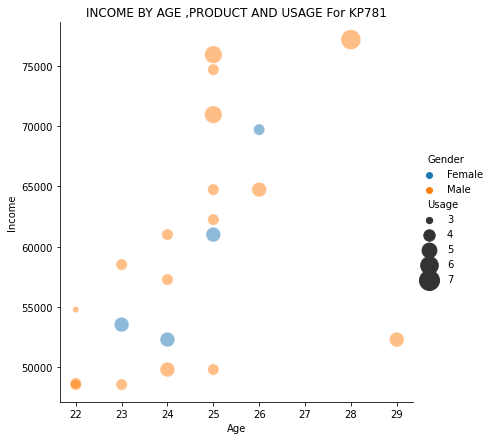

In [ ]:
sns.relplot(x="Age", y="Income", hue="Gender", size="Usage",
            sizes=(40, 400), alpha=.5,
            height=6, data=df_KP78).set(title='INCOME BY AGE ,PRODUCT AND USAGE For KP781');

In [ ]:
pd.crosstab(index=df_KP78['Gender'],columns=df['MaritalStatus'],margins=True, normalize=True)*100

MaritalStatus,Partnered,Single,All
Gender,,,
Female,4.761905,14.285714,19.047619
Male,42.857143,38.095238,80.952381
All,47.619048,52.380952,100.000000


Observations
- The average age of customers who bought KP781 is 24, whereas the min and max age is 22 and 29 respectively.
- Average Income of customers who have KP781 has 59825.
- Partnered Female customers using KP781 about 4% however Partnered male has 42%
- Single Female using KP781 about 14% while Single male using about 38%

# Recommendations

- We can sell KP781 to male customers who have income more than 50k with age between 20 to 30 and 
  also we can create a community to challenge others since the usage of this product is more compare than others
- Partnered Female customers showing intrest to purchase KP281. 
- Partnered Male customers who have income less than 50K  showing intrest to purchase KP481